In [225]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_excel("Kepadatan Penduduk menurut Provinsi.xlsx")
df.head()

,Provinsi,Kepadatan Penduduk menurut Provinsi (jiwa/km2),Unnamed: 2,Unnamed: 3
0,NaN,2019.0,2020.0,2021.0
1,ACEH,93.0,91.0,92.0
2,SUMATERA UTARA,200.0,203.0,205.0
3,SUMATERA BARAT,130.0,132.0,133.0
4,RIAU,80.0,73.0,75.0


In [226]:
df = df.rename(columns={"Kepadatan Penduduk menurut Provinsi (jiwa/km2)":"2019","Unnamed: 2":"2020","Unnamed: 3":"2021"})
df.head()

,Provinsi,2019,2020,2021
0,NaN,2019.0,2020.0,2021.0
1,ACEH,93.0,91.0,92.0
2,SUMATERA UTARA,200.0,203.0,205.0
3,SUMATERA BARAT,130.0,132.0,133.0
4,RIAU,80.0,73.0,75.0


In [227]:
df.isna().sum()

Provinsi    2
2019        4
2020        4
2021        4
dtype: int64

In [228]:
df = df.dropna()
df.isna().sum()

Provinsi    0
2019        0
2020        0
2021        0
dtype: int64

In [229]:
df['2019']=df['2019'].astype(int)
df['2020']=df['2020'].astype(int)
df['2021']=df['2021'].astype(int)

In [230]:
provinsi_di_jawa = ['JAWA TIMUR','JAWA TENGAH','DI YOGYAKARTA', 'JAWA BARAT', 'DKI JAKARTA', 'BANTEN']
is_in = df['Provinsi'].isin(provinsi_di_jawa)
df = df.loc[is_in]

In [231]:
df = df.sort_values(["Provinsi"])
df = df.reset_index(drop=True)
df.head()

,Provinsi,2019,2020,2021
0,BANTEN,1338,1232,1248
1,DI YOGYAKARTA,1227,1171,1185
2,DKI JAKARTA,15900,15907,15978
3,JAWA BARAT,1394,1365,1379
4,JAWA TENGAH,1058,1113,1120


In [232]:
df.describe()

,2019,2020,2021
count,6.000000,6.000000,6.000000
mean,3624.666667,3606.500000,3627.500000
std,6017.136916,6028.380471,6052.978465
min,831.000000,851.000000,855.000000
25%,1100.250000,1127.500000,1136.250000
50%,1282.500000,1201.500000,1216.500000
75%,1380.000000,1331.750000,1346.250000
max,15900.000000,15907.000000,15978.000000


In [233]:
df_melt = pd.melt(df, id_vars='Provinsi', var_name='Tahun', value_name='Kepadatan')
df_melt

,Provinsi,Tahun,Kepadatan
0,BANTEN,2019,1338
1,DI YOGYAKARTA,2019,1227
2,DKI JAKARTA,2019,15900
3,JAWA BARAT,2019,1394
4,JAWA TENGAH,2019,1058
5,JAWA TIMUR,2019,831
6,BANTEN,2020,1232
7,DI YOGYAKARTA,2020,1171
8,DKI JAKARTA,2020,15907
9,JAWA BARAT,2020,1365


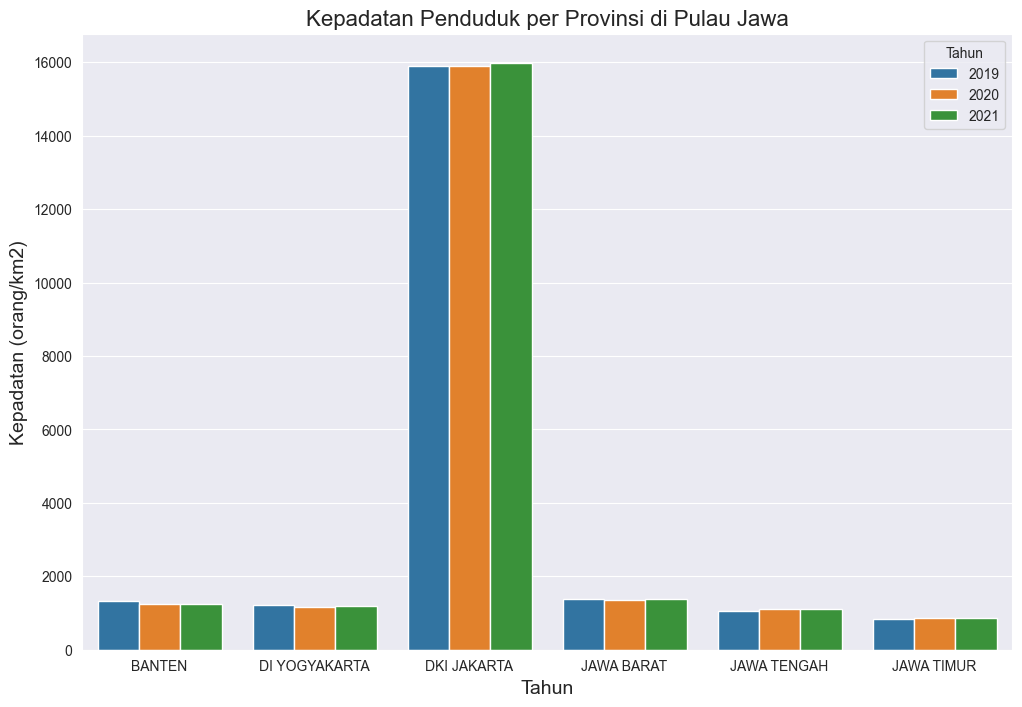

In [234]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
sns.barplot(data=df_melt,x='Provinsi',y='Kepadatan',hue='Tahun')
plt.title('Kepadatan Penduduk per Provinsi di Pulau Jawa', fontsize=16)
plt.xlabel('Tahun', fontsize=14)
plt.ylabel('Kepadatan (orang/km2)', fontsize=14)
plt.show()

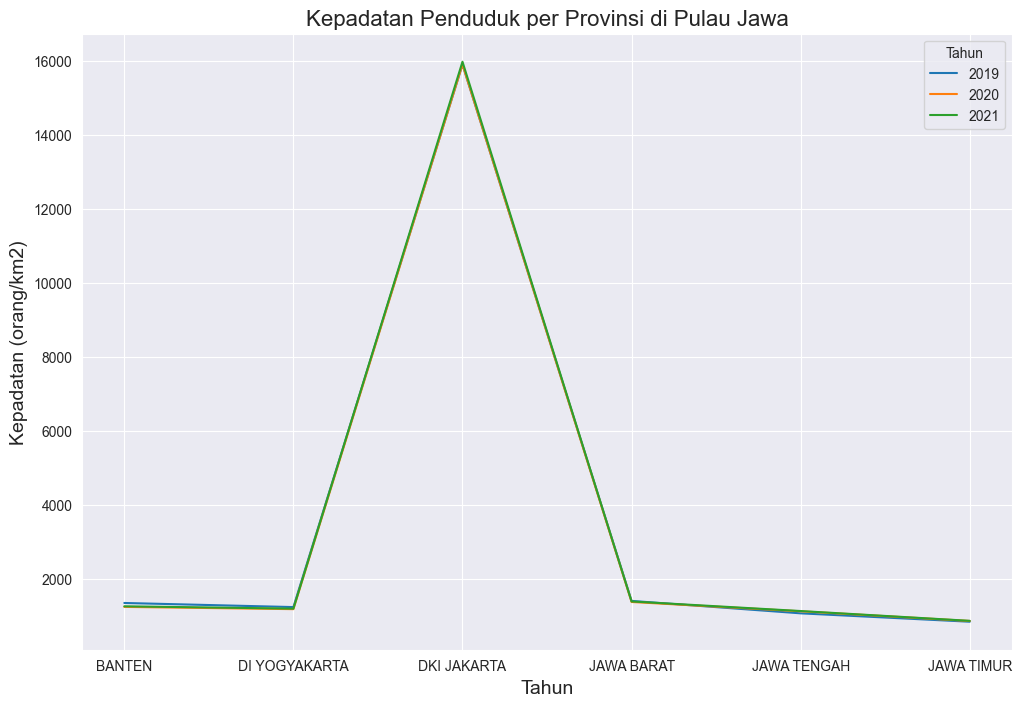

In [235]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
sns.lineplot(data=df_melt,x='Provinsi',y='Kepadatan',hue='Tahun')
plt.title('Kepadatan Penduduk per Provinsi di Pulau Jawa', fontsize=16)
plt.xlabel('Tahun', fontsize=14)
plt.ylabel('Kepadatan (orang/km2)', fontsize=14)
plt.show()

In [236]:
df_pivot = df_melt.pivot(index='Provinsi', columns='Tahun', values='Kepadatan')
df_pivot

Tahun,2019,2020,2021
Provinsi,,,
BANTEN,1338,1232,1248
DI YOGYAKARTA,1227,1171,1185
DKI JAKARTA,15900,15907,15978
JAWA BARAT,1394,1365,1379
JAWA TENGAH,1058,1113,1120
JAWA TIMUR,831,851,855


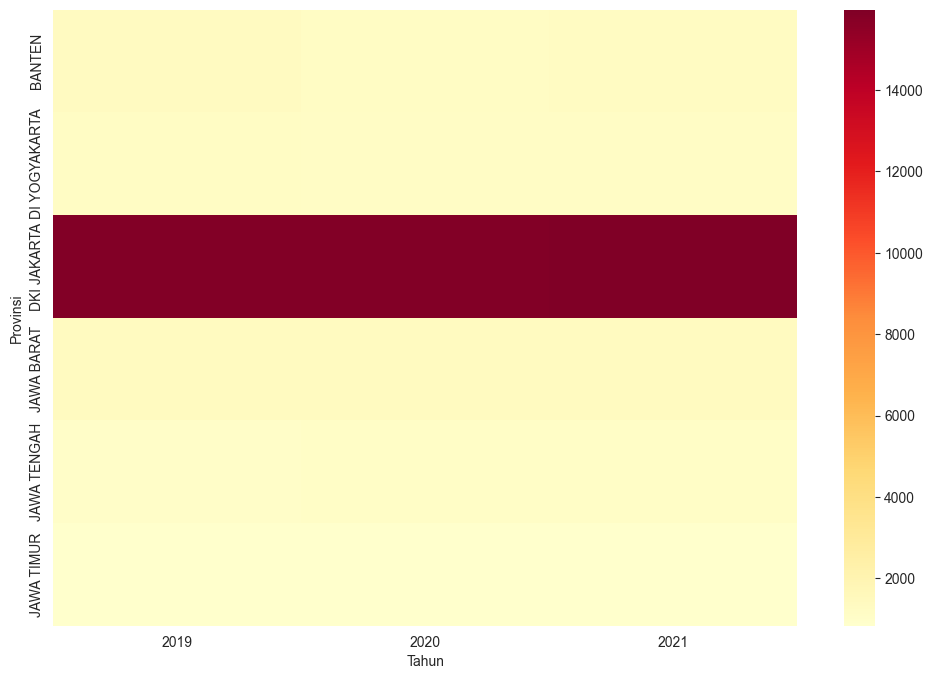

In [237]:
plt.figure(figsize=(12,8))

sns.heatmap(df_pivot, cmap='YlOrRd')
plt.show()